In [3]:
# This is a Data Analytics Projects done by Zac Yeaw
# The aim of project is to investigate the relationship between Gender, Race, Parental Level of Education, 
# Condition of Lunch, Test Preparation Course and Performance in Exam.

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [4]:
df = pd.read_csv(r"c:/Users/yuanz/Desktop/Code/Student Performance in Exam/exams.csv") # import data from csv file
df.head()   # checking first 5 rows if reading correctly

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,85,92,81
1,male,group D,some college,free/reduced,completed,86,88,91
2,male,group C,some high school,standard,none,89,74,71
3,female,group D,high school,free/reduced,none,75,83,84
4,female,group B,some college,standard,none,61,63,66


In [5]:
df.isnull() # checking if data is null

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [6]:
# create a list of our conditions
conditions = [
    (df['math score'] <= 100) & (df['math score'] > 79),
    (df['math score'] <= 79) & (df['math score'] > 59),
    (df['math score'] <= 59) & (df['math score'] > 39),
    (df['math score'] <= 39)
    ]

# create a list of the values we want to assign for each condition
values = ['100-80', '79-60', '59-40', 'Below 40']

# create a new column and use np.select to assign values to it using our lists as arguments
df['math score group'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
0,female,group E,associate's degree,standard,none,85,92,81,100-80
1,male,group D,some college,free/reduced,completed,86,88,91,100-80
2,male,group C,some high school,standard,none,89,74,71,100-80
3,female,group D,high school,free/reduced,none,75,83,84,79-60
4,female,group B,some college,standard,none,61,63,66,79-60


In [7]:
r_conditions = [
    (df['reading score'] <= 100) & (df['reading score'] > 79),
    (df['reading score'] <= 79) & (df['reading score'] > 59),
    (df['reading score'] <= 59) & (df['reading score'] > 39),
    (df['reading score'] <= 39)
    ]

r_values = ['100-80', '79-60', '59-40', 'Below 40']

df['reading score group'] = np.select(r_conditions, r_values)

w_conditions = [
    (df['writing score'] <= 100) & (df['writing score'] > 79),
    (df['writing score'] <= 79) & (df['writing score'] > 59),
    (df['writing score'] <= 59) & (df['writing score'] > 39),
    (df['writing score'] <= 39)
    ]

w_values = ['100-80', '79-60', '59-40', 'Below 40']

df['writing score group'] = np.select(w_conditions, w_values)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group,reading score group,writing score group
0,female,group E,associate's degree,standard,none,85,92,81,100-80,100-80,100-80
1,male,group D,some college,free/reduced,completed,86,88,91,100-80,100-80,100-80
2,male,group C,some high school,standard,none,89,74,71,100-80,79-60,79-60
3,female,group D,high school,free/reduced,none,75,83,84,79-60,100-80,100-80
4,female,group B,some college,standard,none,61,63,66,79-60,79-60,79-60


In [8]:
df["average score"] = (df["math score"]+df["reading score"]+df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group,reading score group,writing score group,average score
0,female,group E,associate's degree,standard,none,85,92,81,100-80,100-80,100-80,86.000000
1,male,group D,some college,free/reduced,completed,86,88,91,100-80,100-80,100-80,88.333333
2,male,group C,some high school,standard,none,89,74,71,100-80,79-60,79-60,78.000000
3,female,group D,high school,free/reduced,none,75,83,84,79-60,100-80,100-80,80.666667
4,female,group B,some college,standard,none,61,63,66,79-60,79-60,79-60,63.333333


In [9]:
a_conditions = [
    (df['average score'] <= 100) & (df['average score'] > 79),
    (df['average score'] <= 79) & (df['average score'] > 59),
    (df['average score'] <= 59) & (df['average score'] > 39),
    (df['average score'] <= 39)
    ]

a_values = ['100-80', '79-60', '59-40', 'Below 40']

df['average score group'] = np.select(a_conditions, a_values)

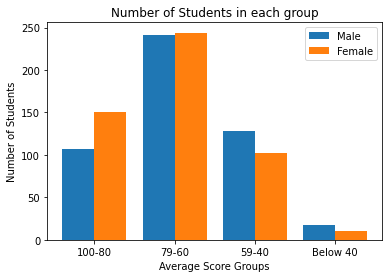

In [10]:
# Bar Chart of gender and average score group

male_as=[]
female_as=[]
for i in range(len(a_values)):
        female_as.append(df[(df["gender"]=="female") & (df["average score group"] == a_values[i])].count()["gender"])
        male_as.append(df[(df["gender"]=="male") & (df["average score group"] == a_values[i])].count()["gender"])

X_axis = np.arange(len(a_values))
        
plt.bar(X_axis - 0.2, male_as, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_as, 0.4, label = 'Female')
  
plt.xticks(X_axis, a_values)
plt.xlabel("Average Score Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

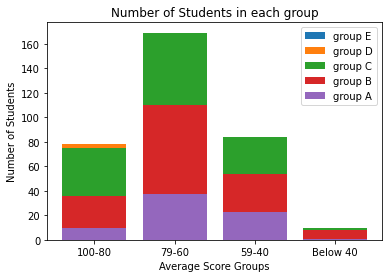

In [11]:
# Bar Chart of race and average score group

listrace = df["race/ethnicity"].unique()
race_as=[[],[],[],[],[]]
for i in range(len(a_values)):
    for j in range(len(listrace)):
        race_as[j].append(df[(df["race/ethnicity"]==listrace[j]) & (df["average score group"] == a_values[i])].count()["gender"])

X_axis = np.arange(len(a_values))

for i in range(len(race_as)):
    plt.bar(X_axis, race_as[i], 0.8, label = listrace[i])
  
plt.xticks(X_axis, a_values)
plt.xlabel("Average Score Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

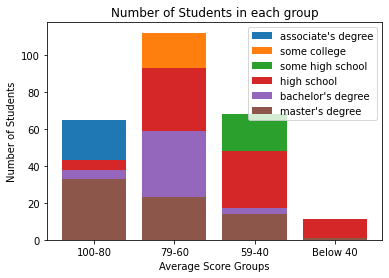

In [12]:
# Bar Chart of parental level of education and average score group

listedu = df["parental level of education"].unique()
edu_as=[[],[],[],[],[],[]]
for i in range(len(a_values)):
    for j in range(len(listedu)):
        edu_as[j].append(df[(df["parental level of education"]==listedu[j]) & (df["average score group"] == a_values[i])].count()["gender"])

X_axis = np.arange(len(a_values))

for i in range(len(edu_as)):
    plt.bar(X_axis, edu_as[i], 0.8, label = listedu[i])
  
plt.xticks(X_axis, a_values)
plt.xlabel("Average Score Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

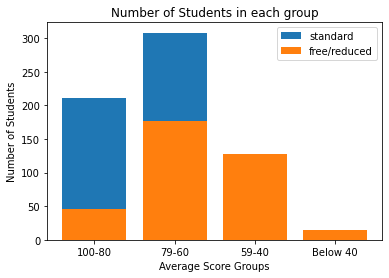

In [13]:
# Bar Chart of lunch and average score group

listlunch = df["lunch"].unique()
lunch_as=[[],[]]
for i in range(len(a_values)):
    for j in range(len(listlunch)):
        lunch_as[j].append(df[(df["lunch"]==listlunch[j]) & (df["average score group"] == a_values[i])].count()["gender"])

X_axis = np.arange(len(a_values))

for i in range(len(lunch_as)):
    plt.bar(X_axis, lunch_as[i], 0.8, label = listlunch[i])
  
plt.xticks(X_axis, a_values)
plt.xlabel("Average Score Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

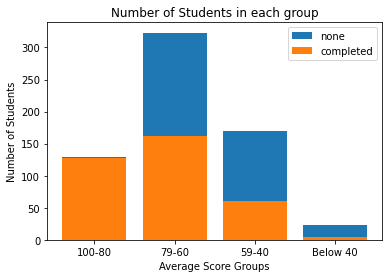

In [14]:
# Bar Chart of test preparation course and average score group

listprep = df["test preparation course"].unique()
prep_as=[[],[]]
for i in range(len(a_values)):
    for j in range(len(listprep)):
        prep_as[j].append(df[(df["test preparation course"]==listprep[j]) & (df["average score group"] == a_values[i])].count()["gender"])

X_axis = np.arange(len(a_values))

for i in range(len(prep_as)):
    plt.bar(X_axis, prep_as[i], 0.8, label = listprep[i])
  
plt.xticks(X_axis, a_values)
plt.xlabel("Average Score Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [15]:
g_conditions = [
    (df['gender'] == "female"),
    (df['gender'] == "male")
    ]
g_values = [False,True]
df['gender_bool'] = np.select(g_conditions, g_values)

a = np.array(df["gender_bool"])
b = np.array(df["average score"])
stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=-0.11468840586754803, pvalue=0.00027881467142725207)

the correlation between gender and average score of student is very low to consider as low correlation and statistically significant(p<0.05).

In [16]:
edu_conditions = [
    (df["parental level of education"] == "associate's degree"),
    (df["parental level of education"] == 'some college'),
    (df["parental level of education"] == 'some high school'),
    (df["parental level of education"] == 'high school'),
    (df["parental level of education"] == "bachelor's degree"),
    (df["parental level of education"] == "master's degree"),
    ]
edu_values = [0,1,2,3,4,5]
df['edu_int'] = np.select(g_conditions, g_values)

coef, p = stats.spearmanr(df['edu_int'], df["average score"])
print(coef,p)

-0.1143342214007081 0.0002912847187195697


the correlation between parental level of education and average score of student is very low to consider as low correlation and statistically significant(p<0.05).

In [18]:
l_conditions = [
    (df['lunch'] == "standard"),
    (df['lunch'] == "free/reduced")
    ]
l_values = [False,True]
df['lunch_bool'] = np.select(l_conditions, l_values)

a = np.array(df["lunch_bool"])
b = np.array(df["average score"])
stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=-0.3079617203268754, pvalue=2.0680896308104388e-23)

the correlation between lunch condition and average score of student is the highest among all other variables, have low correlation and statistically significant(p<0.05).

In [19]:
prep_conditions = [
    (df["test preparation course"] == "none"),
    (df["test preparation course"] == "completed")
    ]
prep_values = [False,True]
df['prep_bool'] = np.select(prep_conditions, prep_values)

a = np.array(df["prep_bool"])
b = np.array(df["average score"])
stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=0.20902956406241718, pvalue=2.4604361091510156e-11)

the correlation between completion of test preparation course and average score of student is very low to consider as low correlation and statistically significant(p<0.05).

Conclusion

1) Parents' education level may affect the performance of students, but not the important one.
2) Finishing preparation course is benefitial.
3) Having lunch is important to students, and it is also the most significant one.
4) Gender has no correlation with the score.
5) For ethnicity, conclusion of relationship between performance of students and thier races can't be made as the proportion of different races are not fixed.

In summary, if students want to have good performance, they should have enough nutrient and make effort to prepare the test.